# Data Preprocessing and Cleaning


## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [4]:
df = pd.read_csv("/content/drive/MyDrive/DQlab/Machine Learning & AI - Batch 15/Day 2 - Data Preprocessing and Cleaning/telco_churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
 12  DataQuota         7046 non-null   float64
dtypes: float64(5), object(8)
memory usage: 715.7+ KB


In [5]:
# data snippet
df.head(5)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DataQuota
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No,3.484613
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No,2.536710
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3.757840
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No,5.821249
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2.417958


## Duplicated Data Handling

In [6]:
# check duplicated data overall
df.duplicated().sum()

0

In [7]:
# check duplicated data with more strict condition at ID column
# this is the best practice when our dataset has ID column
df.duplicated(subset='customerID').sum()

22

In [8]:
# optional step
# view of duplicated customerID rows
df[df.duplicated(subset='customerID', keep=False)].sort_values('customerID').head(6)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DataQuota
7039,2236-HILPA,Male,0.0,Yes,Yes,62.0,Two year,No,Credit card (automatic),20.65,1218.45,No,1.838048
5915,2236-HILPA,Male,0.0,Yes,Yes,62.0,Two year,No,Credit card (automatic),20.65,1218.45,No,1.738882
6567,2342-CKIAO,Female,0.0,No,No,2.0,Month-to-month,No,Mailed check,20.30,41.20,No,2.467699
7040,2342-CKIAO,Female,0.0,No,No,2.0,Month-to-month,No,Mailed check,20.30,41.20,No,3.987619
7032,2905-KFQUV,Female,0.0,Yes,No,2.0,Month-to-month,Yes,Credit card (automatic),70.40,154.80,No,3.491944
5835,2905-KFQUV,Female,0.0,Yes,No,2.0,Month-to-month,Yes,Credit card (automatic),70.40,154.80,No,2.203366


In [9]:
# drop duplicated data at customerID level
df = df.drop_duplicates(subset='customerID')

## Handling Missing Values

In [10]:
# check missing values in each column
df.isna().sum()

,0
customerID,1
Gender,15
SeniorCitizen,12
Partner,16
Dependents,19
Tenure,17
Contract,13
PaperlessBilling,13
PaymentMethod,11
MonthlyCharges,10


In [11]:
# percentage of missing values in each column
df.isna().mean()

,0
customerID,0.000142
Gender,0.002136
SeniorCitizen,0.001708
Partner,0.002278
Dependents,0.002705
Tenure,0.002420
Contract,0.001851
PaperlessBilling,0.001851
PaymentMethod,0.001566
MonthlyCharges,0.001424


Missing value pada setiap kolom sangat kecil porsinya \(<5%\), jadi langkah terbaik adalah di-drop saja

In [12]:
# drop all rows with missing values
df = df.dropna()

## Data Transformation

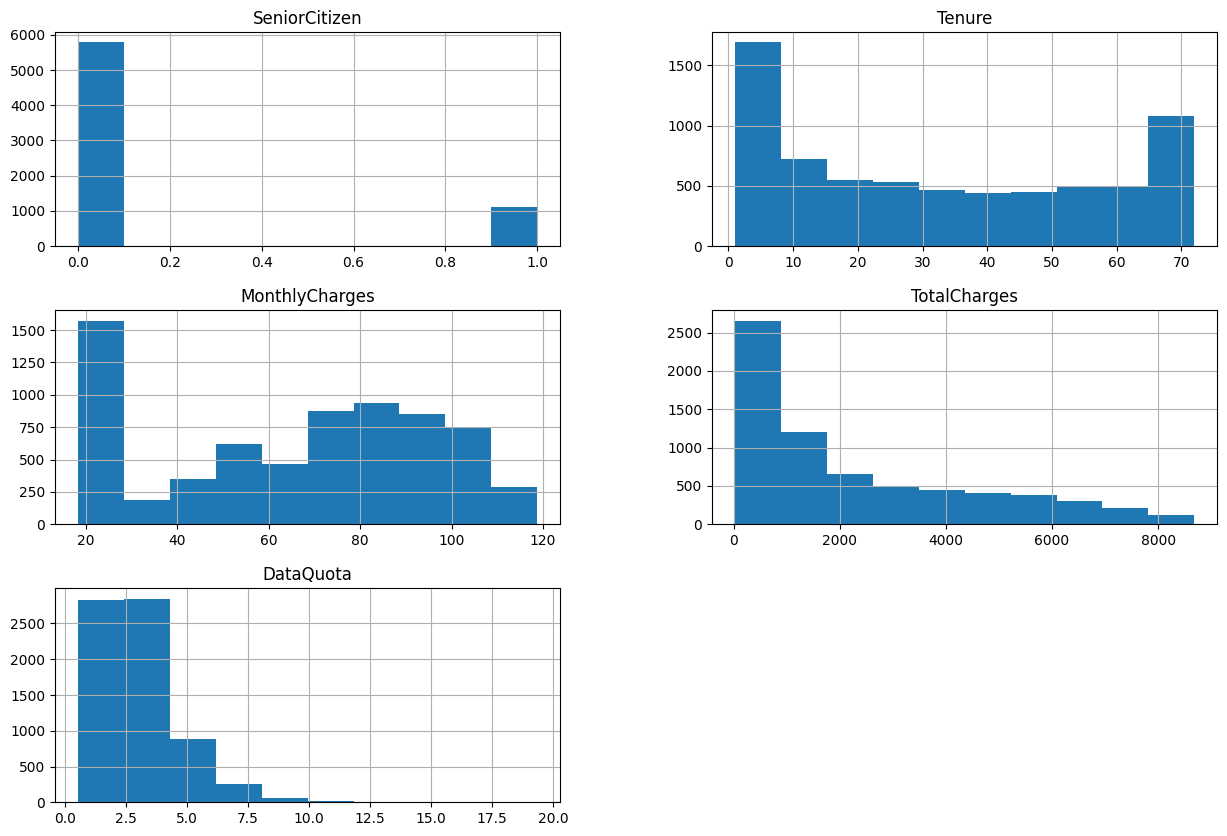

In [13]:
# draw histogram for each numerical column
df.hist(figsize=(15, 10))
plt.show()

Kolom TotalCharges dan DataQuota punya distribusi yang skewed positive. Kita bisa coba apakah log transformasi dapat merubahnya mendekati distribusi normal.

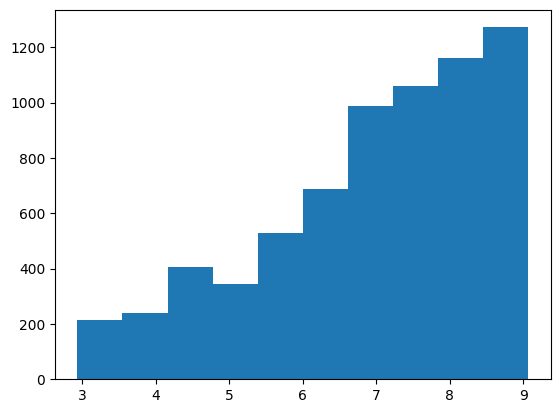

In [14]:
# create an array of log transform TotalCharges column
total_charges_log = np.log(df['TotalCharges'])

# draw as histogram
plt.hist(total_charges_log)
plt.show()

Ternyata transformasi log tidak membuat kolom TotalCharges mendekati distribusi normal, jadi transformasi batal dilakukan

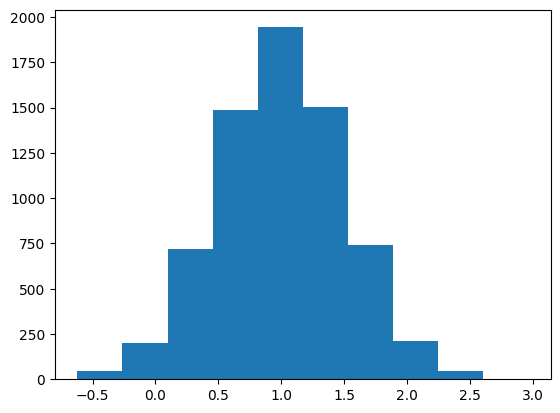

In [15]:
# create an array of log transform DataQuota column
data_quota_log = np.log(df['DataQuota'])

# draw as histogram
plt.hist(data_quota_log)
plt.show()

Kolom DataQuota mendekati distribusi normal saat kita log transform, maka kita persist transformasinya.

In [16]:
# add data_quota_log as a new column in df
df['log_DataQuota'] = data_quota_log

# remove DataQuota column
df = df.drop(columns='DataQuota')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6898 entries, 1 to 7031
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6898 non-null   object 
 1   Gender            6898 non-null   object 
 2   SeniorCitizen     6898 non-null   float64
 3   Partner           6898 non-null   object 
 4   Dependents        6898 non-null   object 
 5   Tenure            6898 non-null   float64
 6   Contract          6898 non-null   object 
 7   PaperlessBilling  6898 non-null   object 
 8   PaymentMethod     6898 non-null   object 
 9   MonthlyCharges    6898 non-null   float64
 10  TotalCharges      6898 non-null   float64
 11  Churn             6898 non-null   object 
 12  log_DataQuota     6898 non-null   float64
dtypes: float64(5), object(8)
memory usage: 754.5+ KB


## Outlier Handling

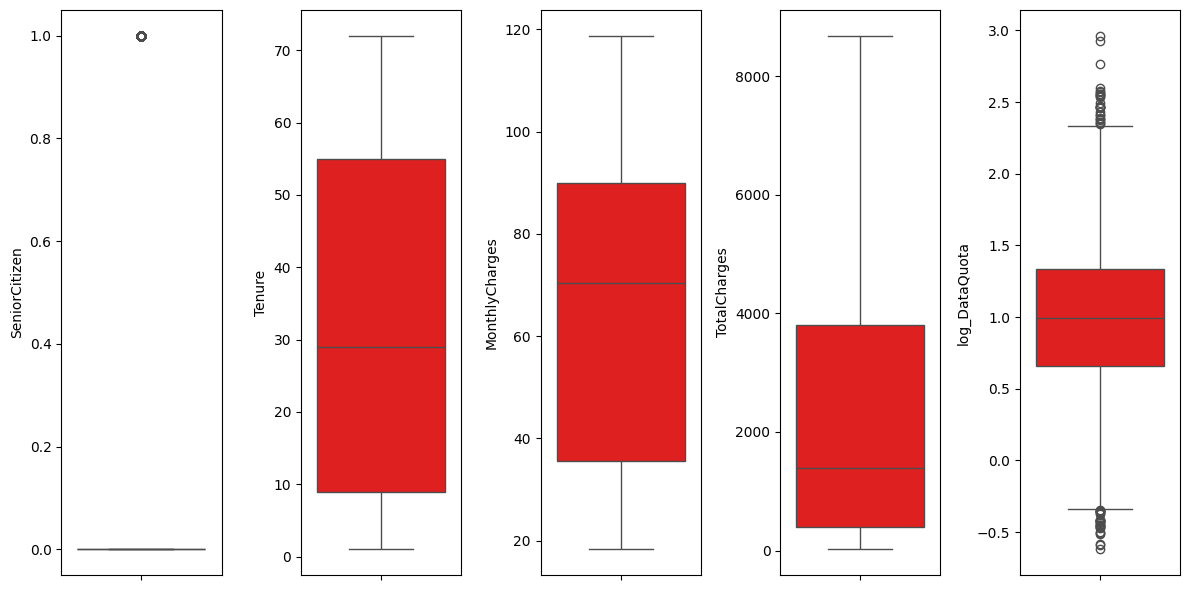

In [17]:
# draw boxplot for each numeric column
plt.figure(figsize=(12,6))

# plotting
features = ['SeniorCitizen','Tenure','MonthlyCharges','TotalCharges','log_DataQuota']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

Observasi
1. Titik pada kolom SeniorCitizen tidak bisa dibilang sebagai outlier, karena value nya binary
2. log_DataQuota memiliki outlier besar dan kecil, kita akan drop mereka

In [18]:
# drop rows that have outliers of log_DataQuota
# Using IQR method
Q1 = df['log_DataQuota'].quantile(0.25)
Q3 = df['log_DataQuota'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['log_DataQuota'] < (Q1 - 1.5 * IQR)) | (df['log_DataQuota'] > (Q3 + 1.5 * IQR)))]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6843 entries, 1 to 7031
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6843 non-null   object 
 1   Gender            6843 non-null   object 
 2   SeniorCitizen     6843 non-null   float64
 3   Partner           6843 non-null   object 
 4   Dependents        6843 non-null   object 
 5   Tenure            6843 non-null   float64
 6   Contract          6843 non-null   object 
 7   PaperlessBilling  6843 non-null   object 
 8   PaymentMethod     6843 non-null   object 
 9   MonthlyCharges    6843 non-null   float64
 10  TotalCharges      6843 non-null   float64
 11  Churn             6843 non-null   object 
 12  log_DataQuota     6843 non-null   float64
dtypes: float64(5), object(8)
memory usage: 748.5+ KB


## Feature Encoding

In [20]:
# value counts of categorical columns in df
# ignore customerID column (meaningless)
features = ['Gender','Partner','Dependents','Contract','PaperlessBilling','PaymentMethod','Churn']

for feature in features:
    print("***"*10)
    print(f'Value Counts of {feature}')
    print(df[feature].value_counts())
    print('\n')


******************************
Value Counts of Gender
Gender
Male      3460
Female    3383
Name: count, dtype: int64


******************************
Value Counts of Partner
Partner
No     3550
Yes    3293
Name: count, dtype: int64


******************************
Value Counts of Dependents
Dependents
No     4803
Yes    2040
Name: count, dtype: int64


******************************
Value Counts of Contract
Contract
Month-to-month    3767
Two year          1647
One year          1429
Name: count, dtype: int64


******************************
Value Counts of PaperlessBilling
PaperlessBilling
Yes    4052
No     2791
Name: count, dtype: int64


******************************
Value Counts of PaymentMethod
PaymentMethod
Electronic check             2287
Mailed check                 1568
Bank transfer (automatic)    1507
Credit card (automatic)      1481
Name: count, dtype: int64


******************************
Value Counts of Churn
Churn
No     5034
Yes    1809
Name: count, dtype: int64




Observasi:
1. Kolom Gender binary: dengan value Male dan Female --> label encode
2. Kolom Partner, Dependents, PaperlessBilling, dan Churn juga binary: dengan value Yes dan No --> label encode
3. Kolom Contract, PaymentMethod punya banyak value --> One Hot Encoding

In [21]:
# label encode gender
gender_map = {
    'Male': 1,
    'Female': 0
}

df['Gender'] = df['Gender'].map(gender_map)

<ipython-input-21-2c746bbb7d71>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].map(gender_map)


In [22]:
# label encode Partner, Dependents, and Churn
binary_map = {
    'Yes': 1,
    'No': 0
}

for col in ['Partner', 'Dependents', 'PaperlessBilling','Churn']:
    df[col] = df[col].map(binary_map)

<ipython-input-22-921269a61793>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(binary_map)
<ipython-input-22-921269a61793>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(binary_map)
<ipython-input-22-921269a61793>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [23]:
# one hot encode Contract, PaymentMethod
df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod'], dtype='int')

In [24]:
# drop customerID
df = df.drop(columns='customerID')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6843 entries, 1 to 7031
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Gender                                   6843 non-null   int64  
 1   SeniorCitizen                            6843 non-null   float64
 2   Partner                                  6843 non-null   int64  
 3   Dependents                               6843 non-null   int64  
 4   Tenure                                   6843 non-null   float64
 5   PaperlessBilling                         6843 non-null   int64  
 6   MonthlyCharges                           6843 non-null   float64
 7   TotalCharges                             6843 non-null   float64
 8   Churn                                    6843 non-null   int64  
 9   log_DataQuota                            6843 non-null   float64
 10  Contract_Month-to-month                  6843 non-nul

## Feature Scaling
min-max scaler

In [26]:
# min-max scaling all column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for col in df.columns:
    df[col] = scaler.fit_transform(df[[col]])

In [28]:
df.describe()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,log_DataQuota,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,6843.000000,6843.000000,6843.000000,6843.000000,6843.000000,6843.000000,6843.000000,6843.000000,6843.000000,6843.000000,6843.000000,6843.000000,6843.000000,6843.000000,6843.000000,6843.000000,6843.000000
mean,0.505626,0.161479,0.481222,0.298115,0.443262,0.592138,0.463403,0.261875,0.264358,0.499644,0.550490,0.208827,0.240684,0.220225,0.216426,0.334210,0.229139
std,0.500005,0.367999,0.499684,0.457464,0.345287,0.491473,0.299837,0.261460,0.441023,0.181898,0.497481,0.406500,0.427530,0.414429,0.411838,0.471748,0.420310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,0.000000,0.171144,0.044282,0.000000,0.375423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.394366,1.000000,0.518905,0.159543,0.000000,0.499581,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.760563,1.000000,0.712935,0.437261,1.000000,0.624670,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Selesai
Data kita siap menjadi bahan baku pelatihan model ML